In [ ]:
'''
Adegoke John Adeola, MSc
Center for Biospectroscopy
Monash University
Australia
'''

# Standard data manipulation and plotting
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from pandas import read_csv, DataFrame, concat, read_excel
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Machine and deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras.backend as K

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
# Classification libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.metrics import plot_confusion_matrix
import pickle
# Computer vision and others
# import cv2
import glob
import os
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
# "error", "ignore", "always", "default", "module" or "once"
print(__doc__)


Adegoke John Adeola, MSc
Center for Biospectroscopy
Monash University
Australia



### SVM Analysis of Bone Data using BVD-Cortex
Preprocessed

*   21 Smootehning points
*   Second derivative



In [ ]:
# Load the drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ./drive/My Drive/Bone/BVD
!ls

[Errno 2] No such file or directory: './drive/My Drive/Bone/BVD'
/content/drive/My Drive/Bone/BVD
BVD_AllQ_Cortex.xlsx  BVD_Cortex.png	   R_S.png
BVD_All_spectra.xlsx  BVD_Cortex_test.png  Spectra_BVD_C.xlsx
BVD_Cortex_meta.xlsx  BVD_C_U.xlsx


In [ ]:
Spectra_BVD = read_excel('BVD_C_U.xlsx')
meta_BVD = read_excel('BVD_Cortex_meta.xlsx')

In [ ]:
Spectra_BVD.head()

,871.208647,872.835136,874.462116,876.089585,877.717545,879.345994,880.974934,882.604363,884.234283,885.864693,887.495592,889.126982,890.758861,892.391231,894.024090,895.657440,897.291279,898.925608,900.560428,902.195737,903.831537,905.467827,907.104606,908.741875,910.379635,912.017885,913.656624,915.295854,916.935573,918.575782,920.216482,921.857672,923.499351,925.141520,926.784180,928.427330,930.070969,931.715098,933.359718,935.004828,...,1682.241804,1684.096634,1685.951953,1687.807763,1689.664062,1691.520851,1693.378131,1695.235900,1697.094160,1698.952910,1700.812149,1702.671878,1704.532098,1706.392807,1708.254007,1710.115697,1711.977876,1713.840545,1715.703705,1717.567354,1719.431494,1721.296124,1723.161243,1725.026852,1726.892952,1728.759542,1730.626621,1732.494191,1734.362250,1736.230800,1738.099839,1739.969368,1741.839388,1743.709897,1745.580897,1747.452387,1749.324366,1751.196835,1753.069795,1754.943244
0,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
1,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
2,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
3,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
4,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,

In [ ]:
meta_BVD.head()

,Sample Name,Age,Sex,Names,Bone Type,Anatomy,Type,Class,Smoking Situation
0,D21-05-24-M1C1-1.csv,38,2,B524,Manubrium,Cortex,Bad,1,NS
1,D21-05-24-M1C1-2.csv,38,2,B524,Manubrium,Cortex,Bad,1,NS
2,D21-05-24-M1C1-3.csv,38,2,B524,Manubrium,Cortex,Bad,1,NS
3,D21-05-24-M1C1-4.csv,38,2,B524,Manubrium,Cortex,Bad,1,NS
4,D21-05-24-M1C1-5.csv,38,2,B524,Manubrium,Cortex,Bad,1,NS


In [ ]:
class_BVD = meta_BVD['Type']
Target = meta_BVD['Class']
Names = meta_BVD['Names']

In [ ]:
print(Names.unique())
print(len(Names.unique()))

['B524' 'B345' 'B245' 'B626' 'B708' 'B618' 'B419' 'B760' 'B506']
9


In [ ]:
# index of testset:
# test = B345, B618
indB345 = Names[Names == 'B345'].index
indB618 = Names[Names == 'B618'].index

In [ ]:
test_ind = list(indB524)+list(indB760)
totlist = list(Spectra_BVD.index)
train_ind = [x for x in totlist if x not in test_ind]

test_ind = [x - 1 for x in test_ind]
train_ind = [x - 1 for x in train_ind]
print('number of test and training samples:', len(test_ind), '&', len(train_ind))

number of test and training samples: 205 & 697


In [ ]:
'''Extract classes and target'''
test_cl = class_BVD.iloc[test_ind]
train_cl = class_BVD.iloc[train_ind]

le = LabelEncoder()
train_class = le.fit_transform(train_cl)
test_class = le.transform(test_cl)
print('List of classes:', list(le.classes_))

test_target = Target.iloc[test_ind].values
train_target = Target.iloc[train_ind].values
print('Shape of train and test targets are :',train_target.shape, ' and ', test_target.shape)

IndexError: ignored

In [ ]:
'''Extract spectra'''
print(Spectra_BVD.shape)
test = Spectra_BVD.iloc[test_ind].values
train = Spectra_BVD.iloc[train_ind].values

(769, 506)


In [ ]:
'''Loop through all pipelines:
'''

# Create the parameter grid
param_grid = {
    'C':[0.1,1,10,100,1000], #
    'gamma':[0.0001,0.001,0.01,0.1,1,10],#
    'kernel':['linear','rbf','poly','sigmoid'],
    'degree':[1,2,4]}

svc = SVC(random_state = 42)
model_svc = GridSearchCV(estimator = svc, param_grid = param_grid, #refit=True,
                     cv = 5, n_jobs = -1, verbose = 1, return_train_score=True)
# Fit the grid search to the data
model_svc.fit(train, train_class)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [1, 2, 4],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

Classification report
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00       252
        Good       1.00      1.00      1.00       291

    accuracy                           1.00       543
   macro avg       1.00      1.00      1.00       543
weighted avg       1.00      1.00      1.00       543



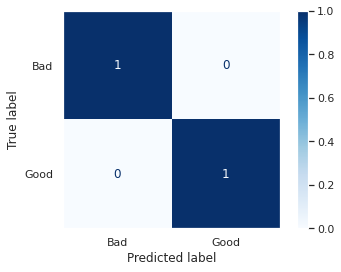

In [ ]:
# Training
dat = train
class_names = ['Bad', 'Good']

y_pred_svc = model_svc.best_estimator_.predict(dat)
print("Classification report")
print(classification_report(train_class, y_pred_svc, target_names=class_names))

cm = confusion_matrix(train_class, y_pred_svc)
np.set_printoptions(suppress=True)

conf = plot_confusion_matrix(model_svc.best_estimator_, train, train_class,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,values_format='.1g',
                             normalize='true')# normalize='true'
#print(conf.confusion_matrix)
plt.grid(None)
plt.show()
#plt.savefig('BVD_Cortex_train.png', dpi=900)

Classification report
              precision    recall  f1-score   support

         Bad       0.81      0.79      0.80        71
        Good       0.90      0.92      0.91       155

    accuracy                           0.88       226
   macro avg       0.86      0.85      0.86       226
weighted avg       0.88      0.88      0.88       226



<Figure size 648x504 with 0 Axes>

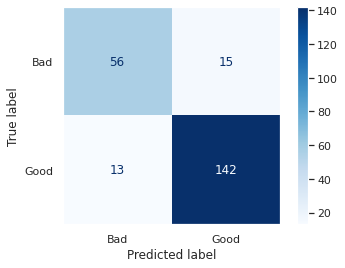

In [ ]:
# Test
dat = test
class_names = ['Bad', 'Good']

y_pred_svc = model_svc.predict(dat)
print("Classification report")
print(classification_report(test_class, y_pred_svc, target_names=class_names))

cm = confusion_matrix(test_class, y_pred_svc)
np.set_printoptions(suppress=True)

fig = plt.figure(figsize=(9,7))
conf = plot_confusion_matrix(model_svc, test, test_class,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,values_format='.4g',
                             normalize=None)# normalize='false'
#print(conf.confusion_matrix)
plt.grid(None)
# plt.show()
plt.savefig('BVD_Cortex_test.png', dpi=900)

In [ ]:
Spectra_BVD_all = read_excel('BVD_All_spectra.xlsx')
meta_BVD_all = read_excel('BVD_AllQ_Cortex.xlsx')

In [ ]:
Spectra_BVD_all.head()

,871.208647,872.835136,874.462116,876.089585,877.717545,879.345994,880.974934,882.604363,884.234283,885.864693,887.495592,889.126982,890.758861,892.391231,894.024090,895.657440,897.291279,898.925608,900.560428,902.195737,903.831537,905.467827,907.104606,908.741875,910.379635,912.017885,913.656624,915.295854,916.935573,918.575782,920.216482,921.857672,923.499351,925.141520,926.784180,928.427330,930.070969,931.715098,933.359718,935.004828,...,1682.241804,1684.096634,1685.951953,1687.807763,1689.664062,1691.520851,1693.378131,1695.235900,1697.094160,1698.952910,1700.812149,1702.671878,1704.532098,1706.392807,1708.254007,1710.115697,1711.977876,1713.840545,1715.703705,1717.567354,1719.431494,1721.296124,1723.161243,1725.026852,1726.892952,1728.759542,1730.626621,1732.494191,1734.362250,1736.230800,1738.099839,1739.969368,1741.839388,1743.709897,1745.580897,1747.452387,1749.324366,1751.196835,1753.069795,1754.943244
0,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
1,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
2,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
3,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,0.042652,0.042684,0.04305,0.043171,0.043524,0.044006,0.044916,0.045691,0.046068,0.046484,0.047316,0.047993,0.048994,0.050107,...,0.6178,0.595354,0.574643,0.558829,0.536735,0.517762,0.496719,0.480455,0.46068,0.444775,0.422895,0.407485,0.389574,0.376431,0.358459,0.3435,0.327835,0.316303,0.299351,0.287659,0.274384,0.264871,0.251269,0.242136,0.233716,0.226934,0.214892,0.20516,0.19799,0.194671,0.188557,0.183196,0.175592,0.170275,0.16455,0.15993,0.161091,0.159856,0.151771,0.148287
4,0.032499,0.032266,0.033019,0.031696,0.033735,0.035323,0.035725,0.035613,0.035954,0.03623,0.036374,0.036635,0.03727,0.037408,0.037901,0.038164,0.03859,0.038799,0.039416,0.039914,0.04067,0.040883,0.041444,0.041782,0.04233,0.042638,

In [ ]:
meta_BVD_all.head()

,Sample Name,Age,Sex,Bone Type,Anatomy,Quartile,Smoking Situation,Bone,Class
0,D21-05-24-M1C1-1.csv,38,2,Manubrium,Cortex,1,NS,B524,Very Bad
1,D21-05-24-M1C1-2.csv,38,2,Manubrium,Cortex,1,NS,B524,Very Bad
2,D21-05-24-M1C1-3.csv,38,2,Manubrium,Cortex,1,NS,B524,Very Bad
3,D21-05-24-M1C1-4.csv,38,2,Manubrium,Cortex,1,NS,B524,Very Bad
4,D21-05-24-M1C1-5.csv,38,2,Manubrium,Cortex,1,NS,B524,Very Bad


In [ ]:
class_BVD_all = meta_BVD_all['Class']
Target_all = meta_BVD_all['Quartile']
Names_all = meta_BVD_all['Bone']

In [ ]:
print(Names_all.unique())
print(len(Names_all.unique()))

['B524' 'B345' 'B245' 'B626' 'B296' 'B377' 'B295' 'B515' 'B726' 'B483'
 'B706' 'B708' 'B618' 'B419' 'B760' 'B506']
16


In [ ]:
# index of testset:
# test = B524, B345, B377, B515, B760.
indB626 = Names_all[Names_all == 'B626'].index     # Very Bad Bone
indB296 = Names_all[Names_all == 'B296'].index     # Bad Bone
indB483 = Names_all[Names_all == 'B483'].index     # Good Bone
indB419 = Names_all[Names_all == 'B419'].index     # Very Good bone


In [ ]:
test_ind = list(indB626)+list(indB296)+list(indB483)+list(indB419)
totlist = list(Spectra_BVD_all.index)
train_ind = [x for x in totlist if x not in test_ind]

test_ind = [x - 1 for x in test_ind]
train_ind = [x - 1 for x in train_ind]
print('number of test and training samples:', len(test_ind), '&', len(train_ind))

number of test and training samples: 252 & 968


In [ ]:
'''Extract classes and target'''
test_cl = class_BVD_all.iloc[test_ind]
train_cl = class_BVD_all.iloc[train_ind]

le = LabelEncoder()
train_class = le.fit_transform(train_cl)
test_class = le.transform(test_cl)
print('List of classes:', list(le.classes_))

test_target = Target_all.iloc[test_ind].values
train_target = Target_all.iloc[train_ind].values
print('Shape of train and test targets are :',train_target.shape, ' and ', test_target.shape)

List of classes: ['Bad', 'Good', 'Very Bad', 'Very Good ']
Shape of train and test targets are : (968,)  and  (252,)


In [ ]:
'''Extract spectra'''
print(Spectra_BVD_all.shape)
test = Spectra_BVD_all.iloc[test_ind].values
train = Spectra_BVD_all.iloc[train_ind].values

(1220, 506)


In [ ]:
'''Loop through all pipelines:
'''

# Create the parameter grid
param_grid = {
    'C':[0.1,1,10,100,1000], #
    'gamma':[0.0001,0.001,0.01,0.1,1,10],#
    'kernel':['linear','rbf','poly','sigmoid'],
    'degree':[1,2,4]}

svc = SVC(random_state = 42)
model_svc = GridSearchCV(estimator = svc, param_grid = param_grid, #refit=True,
                     cv = 5, n_jobs = -1, verbose = 1, return_train_score=True)
# Fit the grid search to the data
model_svc.fit(train, train_class)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 15.2min


Classification report
              precision    recall  f1-score   support

         Bad       0.84      0.91      0.87        57
        Good       0.84      0.84      0.84       245
    Very Bad       0.99      0.84      0.91       195
  Very Good        0.84      0.91      0.88       312

    accuracy                           0.87       809
   macro avg       0.88      0.88      0.88       809
weighted avg       0.88      0.87      0.87       809



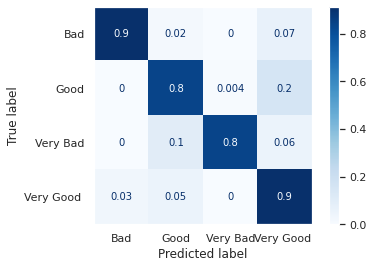

In [ ]:
# Training
dat = train
class_names = ['Q1', 'Q2', 'Q3', 'Q4']

y_pred_svc = model_svc.best_estimator_.predict(dat)
print("Classification report")
print(classification_report(train_class, y_pred_svc, target_names=class_names))

cm = confusion_matrix(train_class, y_pred_svc)
np.set_printoptions(suppress=True)

conf = plot_confusion_matrix(model_svc.best_estimator_, train, train_class,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,values_format='.1g',
                             normalize='true')# normalize='true'
#print(conf.confusion_matrix)
plt.grid(None)
plt.show()
#plt.savefig('BVD_All_cortex.png', dpi=900)

Classification report
              precision    recall  f1-score   support

         Bad       0.33      0.15      0.20        48
        Good       0.07      0.13      0.09       101
    Very Bad       0.82      0.28      0.42       128
  Very Good        0.09      0.10      0.09       134

    accuracy                           0.17       411
   macro avg       0.33      0.17      0.20       411
weighted avg       0.34      0.17      0.21       411



<Figure size 648x504 with 0 Axes>

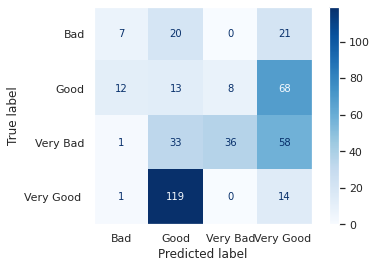

In [ ]:
# Test
dat = test
class_names = ['Bad', 'Good', 'Very Bad', 'Very Good ']

y_pred_svc = model_svc.predict(dat)
print("Classification report")
print(classification_report(test_class, y_pred_svc, target_names=class_names))

cm = confusion_matrix(test_class, y_pred_svc)
np.set_printoptions(suppress=True)

fig = plt.figure(figsize=(9,7))
conf = plot_confusion_matrix(model_svc, test, test_class,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,values_format='.4g',
                             normalize=None)# normalize='false'
#print(conf.confusion_matrix)
plt.grid(None)
# plt.show()
plt.savefig('BVD_Cortex_test.png', dpi=900)